In [13]:
import pdf2image
try:
    from PIL import Image
except ImportError:
    import Image
import pytesseract
from pytesseract import Output

import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import numpy as np
import csv

In [14]:
#convert pdf to img PIL format
def pdf_to_img(pdf_file):
    return pdf2image.convert_from_path(pdf_file)
def ocr_core(file):
    text = pytesseract.image_to_string(file,lang='tha+eng',config='-c preserve_interword_spaces=1')
    return text

## Example of direct OCR

- we can directly get the OCR result with Tesseract library

In [ ]:
pdf_to_img(pdf_file)

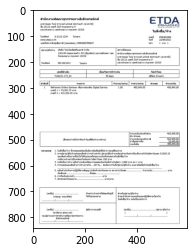

In [11]:
img3 = mpimg.imread('/Users/nichada/MyCode/Etda/pan-OCR/images/PO-im.jpg')
imgplot = plt.imshow(img3)
plt.show()

In [12]:
x2 = pytesseract.image_to_string(Image.open('/Users/nichada/MyCode/Etda/pan-OCR/images/PO-im.jpg'),lang='tha+tha4',config='-c preserve_interword_spaces=1')
print(x2)

สํานักงานพัฒนาธุรกรรมทางอิเล็กทรอนิกส์                                                     ๘ ๔ ว ๔
ในน์ ทาวเวอร์ แครนด์ พระรามเก้ (ลาคารบ
เวรสอหเหรณ                  5ะ2

แขวงห้วยขวาง เขตห้วยขวาง กรุงเทพฯ 10310.

ใบสั่งซื้อ/จ้าง
โทรศัพท์012123-1234 | โทรสาร            ๕๙๑๒๕๖
๔๙/๒๐                  ๔๑-๐,๐๓
เลขที่ประจําตัวตู้เสียภาษี (ของสพซอ.) 0994000789637.                              หน้า 1 จาก 1

ขาย/ผรับจ้าง ปริษัท โทยโลฟสตริมเอกซ์ จํากัด                            ๔.๑๑๑
120บ44 ซอยลาดหล้าว 94 (บัญจมิตร) แขวงหลับพลา เขต | สํานักงานพัฒนาธรกรรมทางฮิเด็กทรอนิกส์
วังทองหลาง กรงเทพฯ 10310                           อาดารเตอะ ในน์ หาวเวอร์ แกรนต์ พระรามเค้า (อาตารบี)
ขึ้น 20.22 เลขที 33/4 ถนนพระราม 9

โทรศัพท์ |/0911921012 |/ โทรสาร          แชรงน่วยขวาง เขตห้วยขวาง กรุงเทพฯ 10310
๑๒๕๖           เงื่อนไขการชาระเงิน           จัดหําโดย
๑๒๕๖๓                         ๓.๗                          ๑๒๑๖๓
๓.๗        รายการ        จํานวน/หน่วย [ ราคา/นน่วย [| สวนฉด | จํานวนเงิน |
๐๙๔๐๒๕๕๐/๗๐,๐๐๐๐ 

# Detect OCR by Area

## Pre-process image 
- download image and pre-process (detech sentences, zoning by cv2 contours)


In [5]:
def make_contour(im):

    img2gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(img2gray, (7,7), 0)

    ret, mask = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2,3))

    dilation = cv2.dilate(mask,kernel,iterations = 2)


    contours, hierarchy = cv2.findContours(dilation, mode=cv2.RETR_EXTERNAL, method=cv2.CHAIN_APPROX_SIMPLE)
    
    return contours,hierarchy

In [6]:
file_name = '/Users/nichada/MyCode/Etda/pan-OCR/images/PO-150'
ext = '.png'

im = cv2.imread(file_name+ext)

contours, hierarchy = make_contour(im)

### Alternative Preporcessing Method

In [7]:
# file_name = '/Users/nichada/MyCode/Etda/pan-OCR/images/PO-im'
# ext = '.jpg'
# invoice = cv2.imread(file_name+ext)
# invoice_copy = cv2.imread(file_name+ext, cv2.IMREAD_GRAYSCALE)

# # Apply contrast
# (thresh, black_white_img) = cv2.threshold(invoice_copy, 127, 255, cv2.THRESH_BINARY)

# # Apply Gaussian blur for smoothing to rid the image of artifacts
# blur = cv2.GaussianBlur(black_white_img,(9,9),0)

# # Apply threshold to bring contours to prominence
# th = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 115, 1)

# ret,thresh = cv2.threshold(th,127,255,0)

# # Read our original invoice image to show the contours drawn in green
# original_invoice_img = cv2.imread(file_name+ext)

# # Find the contours in the image and store them in an array
# contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# invoice_contours = cv2.drawContours(dilation, contours, -1, (0, 255, 0), 3)

In [8]:
# (Optional) save ocr from cropped images as .txt

for index,c in enumerate(contours):
    x,y,w,h = cv2.boundingRect(c)
    cv2.rectangle(im, (x, y), (x + w, y + h), (36,255,12), 2)
    
#     # crop image and send to OCR  , false detected will return no text 
    
#     cropped = im[y :y +  h , x : x + w]
    
#     print(index)

#     if not os.path.exists(file_name):
#         os.mkdir(file_name)
#     s = file_name + '/crop_' + str(index) + '.jpg' 
#     cv2.imwrite(s , cropped)
    
#     # ocr and save .txt
#     ocr_res = ocr_core(s)

#     t = file_name + '/txt_' + str(index)

#     with open(t, "w") as text_file:
#         text_file.write(ocr_res)


#     print(ocr_res)

    
# cv2.imshow('thresh', mask)
# cv2.imshow('dilation', dilation)
# cv2.imshow('im', im)


# cv2.waitKey(0)
# cv2.destroyAllWindows() # destroys the window showing image
# cv2.waitKey(1) #for mac OS

## Index ocr text with coordinate
- Read the image, crop the area and send to ocr.  The result of ocr is the list of strings.  
- I also want to be able to locate the keywords on the image, so I save the cooridinate (x,y,w,h) with the strings in dictionary and store in .csv
- Then, I can search keywords in dictionary and highlight the boundary box on the image. 


In [9]:
# Optional- show image
cv2.imshow('crop', im)
cv2.waitKey(0)
cv2.destroyAllWindows() # destroys the window showing image
cv2.waitKey(1) #for mac OS

-1

crop image, save cropped image and save ocr text to .csv

In [10]:
im_copy = im.copy()

# Iterate through our contours
index = 0
dt = {}

for index,c in enumerate(contours):
    x,y,w,h = cv2.boundingRect(c)
    cv2.rectangle(im_copy, (x, y), (x + w, y + h), (36,255,12), 2)
    
    # crop image and send to OCR  , false detected will return no text 
    
    cropped = im[y :y +  h , x : x + w]
    
    # save crop path
    if not os.path.exists(file_name):
        os.mkdir(file_name)

    s = file_name + '/crop_' + str(index) + '.jpg' 
    cv2.imwrite(s , cropped)
    
    
    # ocr and save .txt
    raw_values_area = ocr_core(s).replace("  ", "").split('\n')
    
    ##cleaning
    for i,value in enumerate(raw_values_area):
        if value == '' or value == ' ' :
            ## store area, corr in dict
            raw_values_area.pop(i)
    
    corr = (x,y,w,h)
    
    if raw_values_area != []:
        dt[corr] = raw_values_area    


t = file_name + '/txt_raw' 

with open(t+'.csv', "w") as csv_file:
    writer = csv.writer(csv_file)
    for c, values in dt.items():
        writer.writerow([c, values])


cv2.imshow('crop', im_copy)
cv2.waitKey(0)
cv2.destroyAllWindows() # destroys the window showing image
cv2.waitKey(1) #for mac OS
#     print(raw_text_values)


-1

In [11]:
cv2.imshow('crop', im_copy)
cv2.waitKey(0)
cv2.destroyAllWindows() # destroys the window showing image
cv2.waitKey(1) #for mac OS
#     print(raw_text_values)


-1

## Search in OCR and Highlight search on Image

In [12]:
# search the coordinate of the keyword
def search_ocr(keyword,dict_):
    val_list = list(dt.values())
    key_list = list(dt.keys())
    corr_ls = []
    sent_ls = []

    for area in dt.values():
        position = val_list.index(area)
        for sent in area:
            if keyword in sent:
                corr = key_list[position]
                sent_ls.append(sent)
                if corr not in corr_ls:
                    corr_ls.append(key_list[position]) 
                    
    return corr_ls, sent_ls

corr_ls_1, sent_ls_1 = search_ocr('ซื้อ',dt)

In [13]:
# the resulting coordinate
for x in corr_ls_1:
    print(x)
for y in sent_ls_1:
    print(y)


(53, 1423, 1129, 299)
(797, 1231, 219, 26)
(196, 1118, 822, 71)
(196, 1118, 102, 26)
(961, 152, 153, 35)
ใบสังซื้อ/จ้าง ฉบับนี้ทุกประการ
ลงลายมือชื่อในใบสังซื้อ/จ้าง
บสังซื้อ/จ้าง นี้จะสมบูรณ์ต่อเมื่อมีลายมือชื่อผู้ที่มีอํานาจอนุมัติลงนาม
องสินค้าหรืองานที่ยังไม่ได้รับมอบหรือของวงเงินทั้งหมดตามใบสั่งซื้อ/จ้าง
ใบสังซื้อ/จ้าง
ใบสิ่งซื้อ/จ้าง


In [14]:
# now, highlight keyword area found on the image
def find_area(corr_ls,file_):
    global image
    global cache
    image = cv2.imread(file_)
    
    cache = image.copy()
    # ignore first crop as it refers to the whole page
    invoice = cv2.imread(file_)
    
    for i,corr in enumerate(corr_ls):
        image = cache.copy()
        x,y,w,h = corr
        cv2.rectangle(image, (x, y), (x + w, y + h), (36,255,12), 2)
        cv2.imshow('crop', image)
        cv2.waitKey(0)
        cv2.destroyAllWindows() # destroys the window showing image
        cv2.waitKey(1) #for mac OS
    
find_area(corr_ls_1,'/Users/nichada/MyCode/Etda/pan-OCR/images/PO-150.png')

## Match Schema (Interested Field)

- enter keywords in the `search_ocr` formula, then use `find_area` to highlight that word

In [15]:
import re
corr_ls_2, sent_ls_2 = search_ocr('ผู้ขาย' or 'ผู้รับจ้าง',dt)
for y in sent_ls_2:
    print(y)
for x in corr_ls_2:
    print(x)
find_area(corr_ls_2,'/Users/nichada/MyCode/Etda/pan-OCR/images/PO-150.png')

สําหรับผู้ขาย/ผู้รับจ้าง:
กําหนดส่งมอบสินค้า/การจ้างภายใน.[...60'เวัน... นับถัดจากวันที่/ผู้ขาย/ผู้รับจ้าง
ากผู้ขาย7ผู้รับจ้างส่งมอบสินค้า/งานจ้างล่าช้า ผู้ขาย/ผู้รับจ้างจะต้องชําระเงินค่าปรับเป็นรายวันในอัตราร้อยละ
ผู้ขาย/ผู้รับจ้าง
(53, 1423, 1129, 299)
(196, 1192, 596, 67)
(196, 1118, 822, 71)
(53, 300, 1129, 152)


In [16]:
corr_ls_3, sent_ls_3 = search_ocr('เลขที่' or 'PO',dt)
for c in corr_ls_3:
    print(c)
for s in sent_ls_3:
    print(s)
find_area(corr_ls_3,'/Users/nichada/MyCode/Etda/pan-OCR/images/PO-150.png')

(54, 476, 1127, 74)
(53, 300, 1129, 152)
(61, 254, 188, 27)
(931, 204, 44, 45)
เลขที่อ้างอิง
ชั้น 20-22 เลขที่ 33/4 ถนนพระราม 9
เลขที่ประจําตัวผู้เสียภาษี
เลขที่


## Indicate new area to crop

In [ ]:
corr_ls_ = [(53, 300, 1129, 152)]
find_area(corr_ls_,'/Users/nichada/MyCode/Etda/pan-OCR/images/PO-150.png')

## (test) Read inside the table

In [ ]:
file_name = 'images/PO-im'
ext = '.jpg'

im = cv2.imread(file_name+ext)

img2gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(img2gray, (5,5), 0)

ret, mask = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (4,2))

dilation = cv2.dilate(mask,kernel,iterations = 1)



contours, hierarchy = cv2.findContours(dilation, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_SIMPLE)




for index,c in enumerate(contours):
    if hierarchy[0][index][2] < 0 : #no child
        x,y,w,h = cv2.boundingRect(c)
        cv2.rectangle(im, (x, y), (x + w, y + h), (36,255,12), 2)
    elif hierarchy[0][index][3] < 0 : #no parents
        x,y,w,h = cv2.boundingRect(c)
        cv2.rectangle(im, (x, y), (x + w, y + h), (0,0,255), 2)
#     else :
#         x,y,w,h = cv2.boundingRect(c)
#         cv2.rectangle(im, (x, y), (x + w, y + h), (0,0,0), 2)
    
#     # crop image and send to OCR  , false detected will return no text 
    
#     cropped = im[y :y +  h , x : x + w]
    
#     print(index)

#     if not os.path.exists(file_name):
#         os.mkdir(file_name)
#     s = file_name + '/crop_' + str(index) + '.jpg' 
#     cv2.imwrite(s , cropped)
    
#     # ocr and save .txt
#     ocr_res = ocr_core(s)

#     t = file_name + '/txt_' + str(index)

#     with open(t, "w") as text_file:
#         text_file.write(ocr_res)


#     print(ocr_res)

    
cv2.imshow('thresh', mask)
cv2.imshow('dilation', dilation)
cv2.imshow('im', im)


cv2.waitKey(0)
cv2.destroyAllWindows() # destroys the window showing image
cv2.waitKey(1) #for mac OS

In [ ]:
hierarchy[0][1][3]

In [ ]:
for component in zip(contours, hierarchy):
    currentContour = component[0]
    currentHierarchy = component[1]
    print(currentContour)
    print(currentHierarchy)